# 对比NMF和Tucker分解的结果一致性

In [1]:
from cf import CF
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

cf = CF('../merge/whole_month.data', ['log'])

/home/lizimeng/python/lib/python3.6/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


## 非负tucker分解

In [4]:
I,J,K = [8,8,4]
res1 = cf.tucker([I,J,K], [2,2,2,2])
print (res1.RMSE, res1.RRMSE)
print (res1.sparseness)

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-d0f0d12a-aa81-4361-a724-564cfefd7638
Send 'exit' command to kill the server
...MATLAB started and connected!
MATLAB closed
2.05943535778 0.329380880281


## NMF

In [3]:
res2 = cf.nmf_with_square_loss(400)
print (res2.RMSE, res2.RRMSE)
print (res2.sparseness)

243.39479512 38.9279476869
(0.6362099790864475, 0.61628004994539065)


## 时间聚类对比

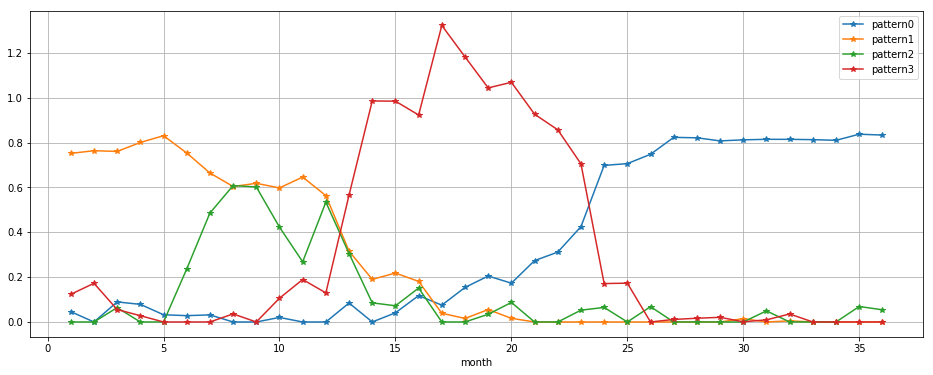

In [5]:
T = res1.T
plt.figure(figsize=(16,6))
for i in range(T.shape[1]):
    plt.plot(range(1,37), T[:,i], label='pattern%d'%i, marker='*')
plt.legend()
plt.grid()
plt.xlabel('month')
plt.show()

In [6]:
H = res2.H
kmeans = KMeans(n_clusters=K, n_jobs=-1)
kmeans.fit(H.T)
kmeans.labels_

array([1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
for i in range